In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [8]:
data = load_diabetes()
X = data.data
y = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [10]:
# Thêm biến giả vào tập huấn luyện và kiểm tra
np.random.seed(0)
n_train, n_test = X_train.shape[0], X_test.shape[0]
n_noise = 5

# Tạo biến giả (nhiễu)
X_train_noise = np.hstack([X_train, np.random.normal(size=(n_train, n_noise))])
X_test_noise = np.hstack([X_test, np.random.normal(size=(n_test, n_noise))])

In [11]:
# Định nghĩa các giá trị λ
alphas = [0.1, 1, 298]

# Khởi tạo các mô hình
ridge_models = []
lasso_models = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha)
    
    # Huấn luyện các mô hình
    ridge.fit(X_train_noise, y_train)
    lasso.fit(X_train_noise, y_train)
    
    ridge_models.append(ridge)
    lasso_models.append(lasso)

In [12]:
# Hàm để tính toán và in kết quả đánh giá
def evaluate_models(ridge_models, lasso_models, X_train, y_train, X_test, y_test):
    fig, axs = plt.subplots(1, len(alphas), figsize=(15, 5), sharey=True)
    
    for i, alpha in enumerate(alphas):
        ridge = ridge_models[i]
        lasso = lasso_models[i]
        
        y_train_pred_ridge = ridge.predict(X_train)
        y_test_pred_ridge = ridge.predict(X_test)
        y_train_pred_lasso = lasso.predict(X_train)
        y_test_pred_lasso = lasso.predict(X_test)
        
        r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
        mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
        r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
        mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
        
        r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
        mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
        r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
        mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
        
        print(f"Ridge - Alpha: {alpha}")
        print(f"Train R²: {r2_train_ridge:.4f}, Train MSE: {mse_train_ridge:.4f}")
        print(f"Test R²: {r2_test_ridge:.4f}, Test MSE: {mse_test_ridge:.4f}")
        print()
        
        print(f"Lasso - Alpha: {alpha}")
        print(f"Train R²: {r2_train_lasso:.4f}, Train MSE: {mse_train_lasso:.4f}")
        print(f"Test R²: {r2_test_lasso:.4f}, Test MSE: {mse_test_lasso:.4f}")
        print()

        # Vẽ biểu đồ hệ số hồi quy trên cùng một biểu đồ với các màu khác nhau
        ax = axs[i]
        ax.plot(ridge.coef_, marker='o', linestyle='None', color='blue', label='Ridge')
        ax.plot(lasso.coef_, marker='x', linestyle='None', color='red', label='Lasso')
        ax.set_title(f'Alpha = {alpha}')
        ax.set_xlabel('Feature index')
        ax.set_ylabel('Coefficient value')
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()


Ridge - Alpha: 0.1
Train R²: 0.5503, Train MSE: 2827.1525
Test R²: 0.3946, Test MSE: 3088.4414

Lasso - Alpha: 0.1
Train R²: 0.5490, Train MSE: 2835.2700
Test R²: 0.3814, Test MSE: 3155.6007

Ridge - Alpha: 1
Train R²: 0.4581, Train MSE: 3406.8497
Test R²: 0.3581, Test MSE: 3274.5019

Lasso - Alpha: 1
Train R²: 0.4164, Train MSE: 3668.7735
Test R²: 0.2970, Test MSE: 3586.4706

Ridge - Alpha: 298
Train R²: 0.0121, Train MSE: 6210.2745
Test R²: -0.0014, Test MSE: 5108.5114

Lasso - Alpha: 298
Train R²: 0.0000, Train MSE: 6286.4420
Test R²: -0.0000, Test MSE: 5101.4935



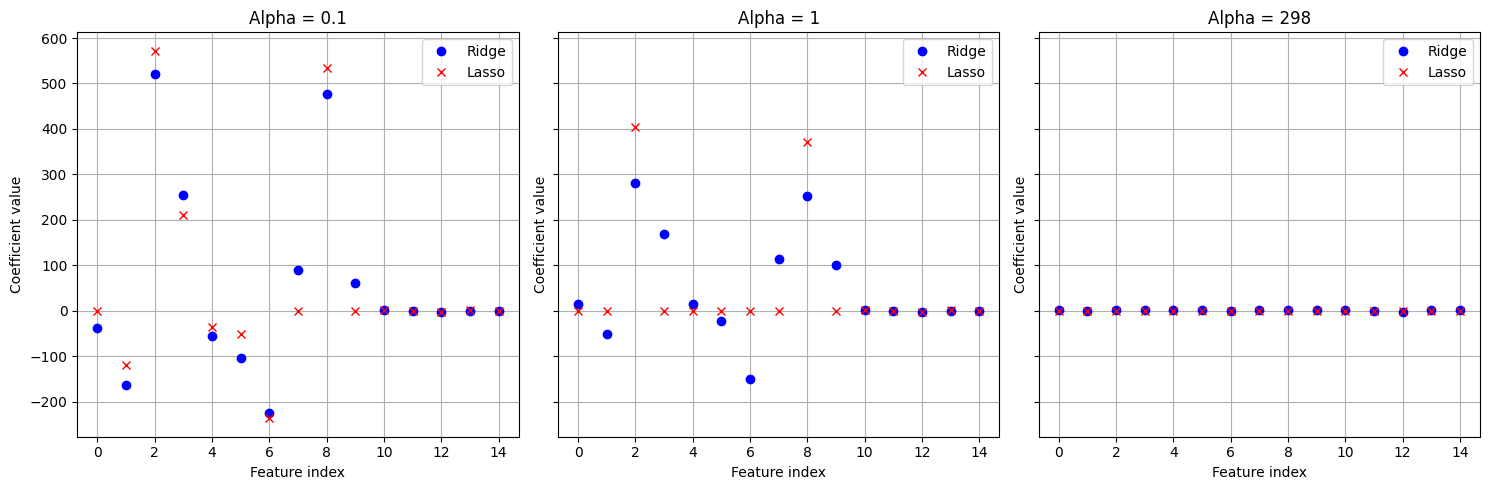

Số lượng biến có hệ số bằng 0 trong Lasso: [3, 10, 15]
Số lượng biến có hệ số bằng 0 trong Ridge: [0, 0, 0]


In [13]:
# Đánh giá mô hình Ridge và Lasso
evaluate_models(ridge_models, lasso_models, X_train_noise, y_train, X_test_noise, y_test)

# Đếm số lượng biến có hệ số bằng 0 trong mô hình Lasso
lasso_zero_coefficients = [np.sum(model.coef_ == 0) for model in lasso_models]
print("Số lượng biến có hệ số bằng 0 trong Lasso:", lasso_zero_coefficients)

# Đếm số lượng biến có hệ số bằng 0 trong mô hình Ridge
# (Lưu ý: Ridge thường không có biến với hệ số bằng 0)
ridge_zero_coefficients = [np.sum(model.coef_ == 0) for model in ridge_models]
print("Số lượng biến có hệ số bằng 0 trong Ridge:", ridge_zero_coefficients)

1. So sánh chỉ số đánh giá (R², MSE):

    Khi sử dụng giá trị λ nhỏ (0.1), cả hai mô hình Ridge và Lasso đều có chỉ số R² và MSE khá tốt trên cả tập huấn luyện và kiểm tra. Điều này cho thấy mô hình đã khớp tốt với dữ liệu mà không bị phạt quá nhiều.
    Khi tăng λ lên (ví dụ: 1 và 298), mô hình Ridge giữ nguyên được các chỉ số R² và MSE khá ổn định, trong khi Lasso có xu hướng giảm đáng kể hiệu suất (R² giảm, MSE tăng). Điều này là do Lasso có xu hướng loại bỏ hoàn toàn các biến không quan trọng khi λ tăng, dẫn đến mô hình trở nên đơn giản hơn nhưng có thể bị underfit.

2. Biểu đồ so sánh hệ số hồi quy:

    Biểu đồ cho thấy hệ số hồi quy của Ridge thường xuyên có giá trị gần nhau và không bằng 0. Điều này phản ánh bản chất của Ridge là làm giảm các hệ số mà không loại bỏ hoàn toàn bất kỳ biến nào.
    Trong khi đó, Lasso với giá trị λ lớn có xu hướng đưa nhiều hệ số về 0, loại bỏ hoàn toàn những biến không quan trọng. Điều này cho thấy Lasso có khả năng chọn lọc biến tốt hơn Ridge trong các bài toán có nhiều biến không liên quan hoặc nhiễu.

3. Số lượng biến có hệ số bằng 0:

    Khi λ tăng, số lượng biến có hệ số bằng 0 trong Lasso tăng lên, đặc biệt là với λ = 298. Điều này cho thấy Lasso có xu hướng đơn giản hóa mô hình bằng cách loại bỏ những biến không quan trọng, trong khi Ridge thì không.

4. Ảnh hưởng của λ đối với hiệu suất mô hình:

    Khi λ tăng, hiệu suất của cả hai mô hình đều bị ảnh hưởng, nhưng ảnh hưởng này rõ rệt hơn ở Lasso do việc loại bỏ biến. Ridge vẫn giữ được hiệu suất ổn định hơn nhờ tính chất làm mịn tất cả các hệ số.